In [ ]:
part0-completed
part1-completed
part2-completed
part3-completed
part4-completed

Cleaned Data:
      Year  Month Customer Segment      Region           KPI Value Type  \
0     2020     12          Clients       India  Lv1_Visitors    Actuals   
1     2020     12          Clients       India  Lv2_Visitors    Actuals   
2     2020     12          Clients       India  Lv3_Visitors    Actuals   
3     2020     12          Clients       India  Lv4_Visitors    Actuals   
4     2020     12          Clients       India  Lv3_Visitors    Actuals   
...    ...    ...              ...         ...           ...        ...   
1567  2022      1        Customers    Dehradun  Lv5_Visitors    Actuals   
1568  2022      1        Customers  Aurangabad  Lv4_Visitors    Actuals   
1569  2022      1        Customers      Ujjain  Lv5_Visitors    Actuals   
1570  2022      1        Customers   Faridabad  Lv5_Visitors    Actuals   
1571  2022      1        Customers  Aurangabad  Lv5_Visitors    Actuals   

          Value  
0      804893.0  
1     2689569.0  
2     1300571.0  
3     1300571

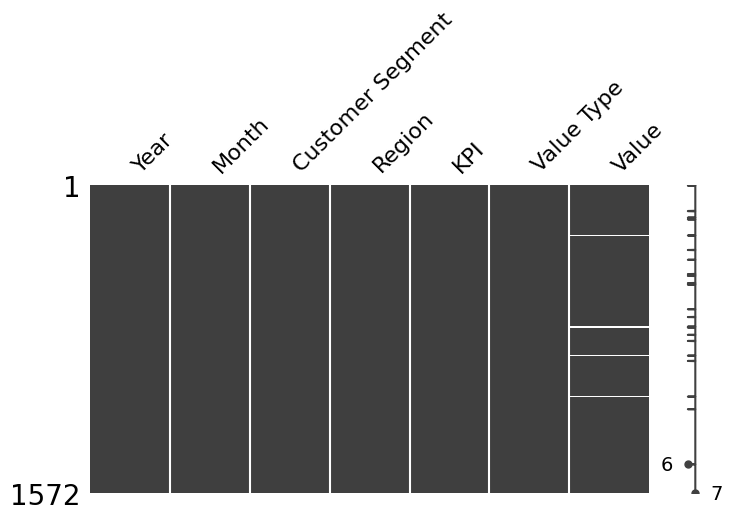

In [ ]:
import pandas as pd
import missingno as msno

# Load the data from the Excel file (make sure you have the 'pandas' and 'missingno' libraries installed)
data = pd.read_excel('Intern Hiring Assignment Data.xlsx', sheet_name='Funnel')

def data_prep(dataset):
    # Step 1: Check for missing values
    missing_values = dataset.isnull().sum()

    # Step 2: Visualize missing values using 'missingno'
    msno.matrix(dataset, figsize=(8, 4), sparkline=True)
    # This will create a matrix plot that visually represents the missing values.

    # Step 3: Handle missing values with an appropriate imputation method
    # In this case, let's use forward fill (ffill) to impute missing values
    dataset_filled = dataset.fillna(method='ffill')

    # Step 4: Count null values in the cleaned dataset
    null_count = dataset_filled.isnull().sum().sum()

    # Print the cleaned dataset and the total count of null values
    print("Cleaned Data:")
    print(dataset_filled)
    print("\nTotal Count of Null Values:", null_count)

    return dataset_filled

# Call the data_prep function to perform the data preparation
cleaned_data = data_prep(data)


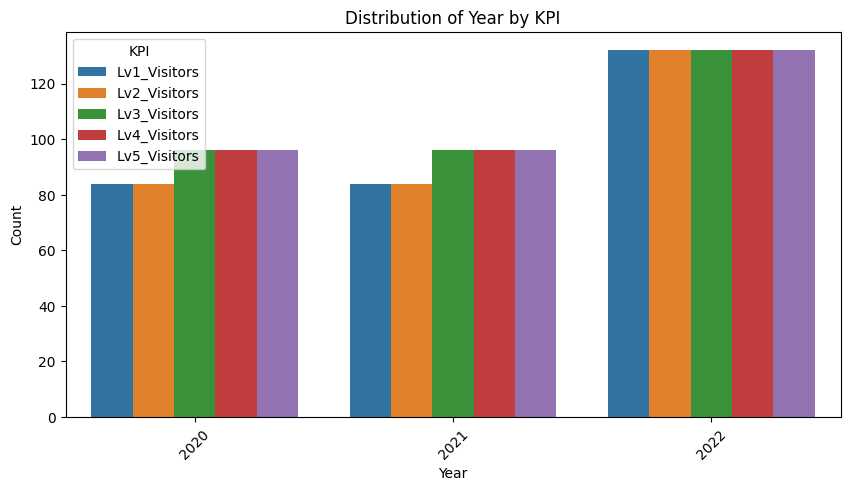

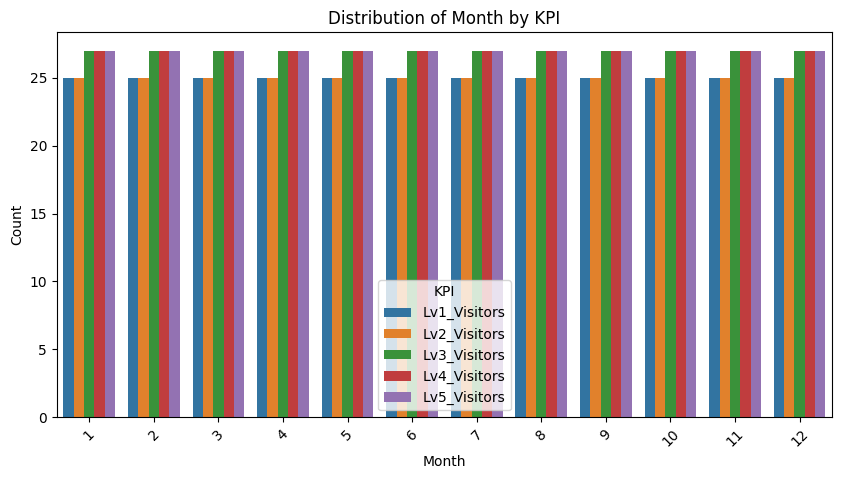

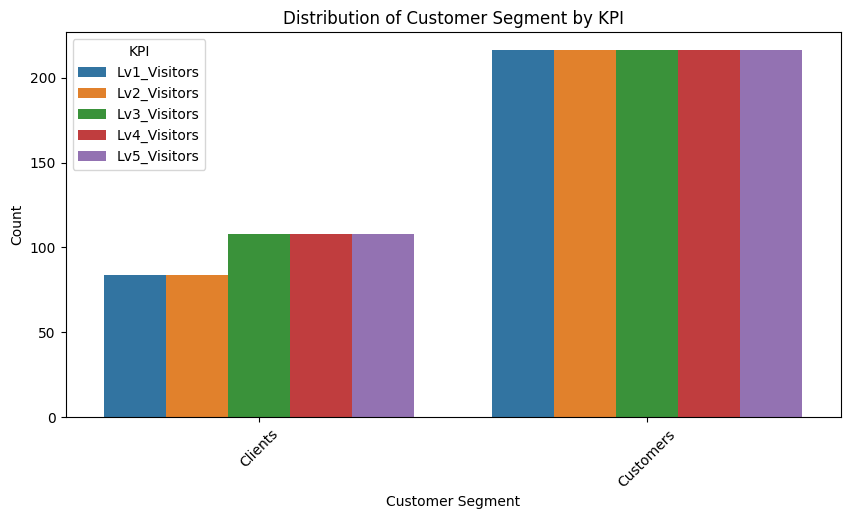

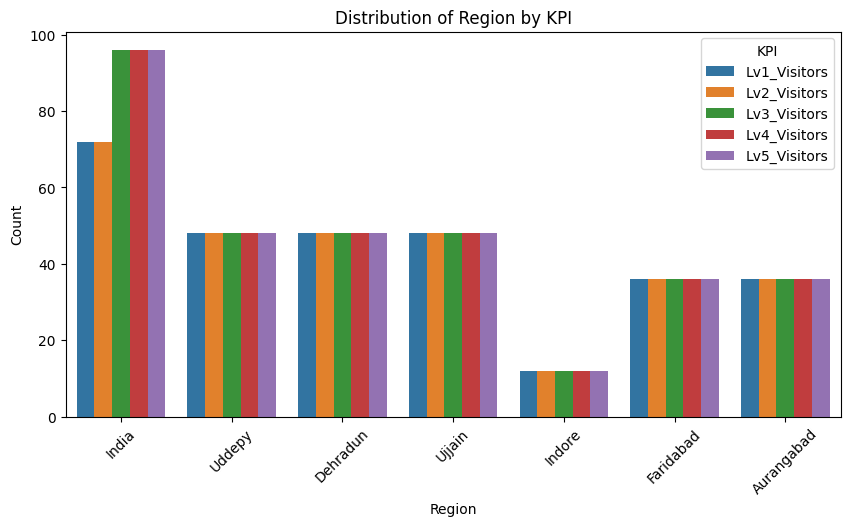

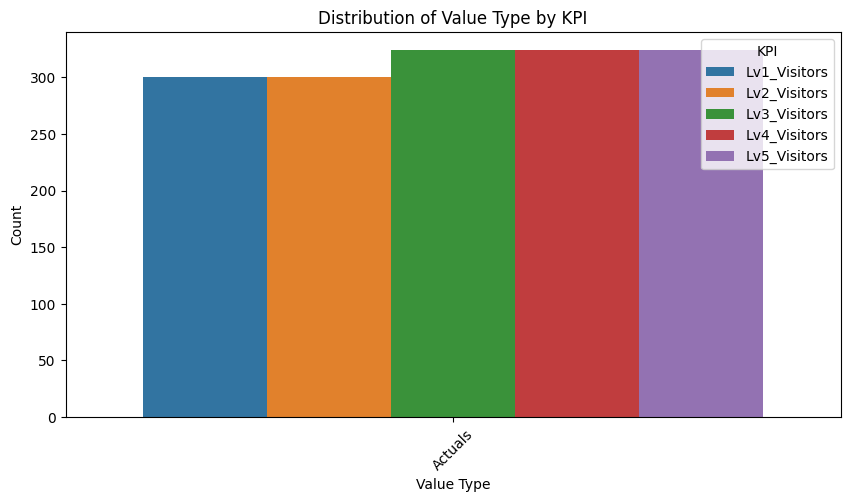

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Generate distribution plots for each categorical column based on the KPI column
categorical_columns = ["Year", "Month", "Customer Segment", "Region", "Value Type"]

for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=column, hue="KPI")
    plt.title(f"Distribution of {column} by KPI")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="KPI")
    plt.show()


In [ ]:
from scipy import stats
# Verify Column Names
print("Column Names in DataFrame:", data.columns)

def remove_outliers(data, level_column):
    z_scores = stats.zscore(data[level_column])
    data_no_outliers = data[(z_scores < 3) & (z_scores > -3)]
    return data_no_outliers
levels = ['Value']
# Remove outliers for each level
for level in levels:
      data = remove_outliers(data, level)

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(data)


Column Names in DataFrame: Index(['Year', 'Month', 'Customer Segment', 'Region', 'KPI', 'Value Type',
       'Value'],
      dtype='object')
DataFrame after removing outliers:
Empty DataFrame
Columns: [Year, Month, Customer Segment, Region, KPI, Value Type, Value]
Index: []


In [ ]:
!pip install -U seaborn

In [ ]:
cleaned_data_no_outliers = data.copy()

In [ ]:
import seaborn as sns

def descriptive_stats(data):
    # Task 1: Pivot view of total visitors segmented by each level, in each year
    pivot_table = data.pivot_table(values='Value', index=['Year'], columns=['Value Type'], aggfunc='sum')

    print("Pivot View of Total Visitors by Level and Year:")
    print(pivot_table)

    # Task 2: Region with maximum no. of Level 5 visitors in each year
    max_level5_region = data[data['Value Type'] == 'Level 5'].groupby('Year')['Value'].idxmax()

    max_level5_region_info = data.loc[max_level5_region, ['Year', 'Region', 'Value']]
    print("\nRegion with Maximum Level 5 Visitors in Each Year:")
    print(max_level5_region_info)
# Call the descriptive_stats function
descriptive_stats(data)

Pivot View of Total Visitors by Level and Year:
Empty DataFrame
Columns: []
Index: []

Region with Maximum Level 5 Visitors in Each Year:
Empty DataFrame
Columns: [Year, Region, Value]
Index: []


In [ ]:
import pandas as pd
import numpy as np

# Define a function to cap outliers in a column
def cap_outliers(data, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = data[column].quantile(lower_percentile)
    upper_bound = data[column].quantile(upper_percentile)

    # Cap outliers below the lower bound
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])

    # Cap outliers above the upper bound
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

# Define the columns for which you want to cap outliers
columns_to_cap = ["Year", "Month", "Customer Segment", "Region", "Value Type"]

# Apply outlier capping to each column
for column in columns_to_cap:
    cleaned_data_no_outliers = cap_outliers(cleaned_data_no_outliers, column)

                                            # Now, you have capped outliers in the 'cleaned_data_no_outliers' DataFrame


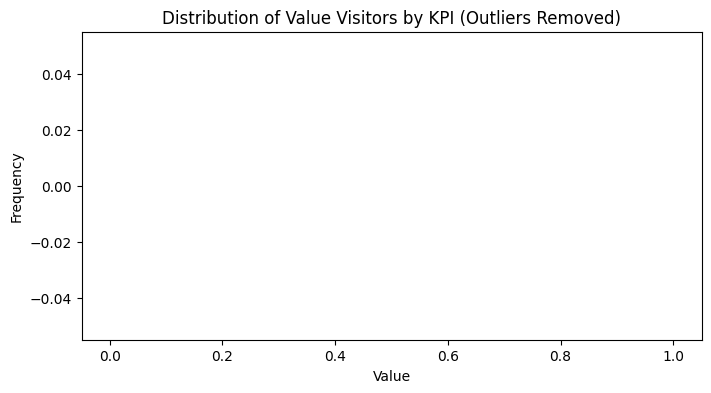

In [ ]:
from scipy import stats
import seaborn

cleaned_data_no_outliers = data.copy()
for level in levels:
    cleaned_data_no_outliers = remove_outliers(cleaned_data_no_outliers, level)

    # Generate distribution plots after removing outliers
    for level in levels:
        plt.figure(figsize=(8, 4))

        plt.hist(data=cleaned_data_no_outliers, x=level)

        plt.title(f"Distribution of {level} Visitors by KPI (Outliers Removed)")
        plt.xlabel(level)
        plt.ylabel("Frequency")
        plt.show()

In [ ]:
def descriptive_stats(dataset):

   # Pivot view of total number of visitors segmented by each categorical level in each year
   pivot_view = dataset.pivot_table(index='Year', columns=categorical_columns, values='Value', aggfunc='sum')

   print("Pivot View of Total Number of Visitors by Categorical Levels in Each Year:")
   print(pivot_view)

   # Region with maximum Level 5 visitors in each year
   max_level5_region = dataset[dataset['Value'] == dataset.groupby('Year')['Value'].transform('max')][['Year', 'Region', 'Value']]

   print("\nRegion with Maximum Level 5 Visitors in Each Year:")
   print(max_level5_region)

# Call the descriptive_stats function to perform the tasks
descriptive_stats(cleaned_data_no_outliers)


Pivot View of Total Number of Visitors by Categorical Levels in Each Year:
Empty DataFrame
Columns: []
Index: []

Region with Maximum Level 5 Visitors in Each Year:
Empty DataFrame
Columns: [Year, Region, Value]
Index: []


<ipython-input-9-7773fbb79ea7>:4: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_view = dataset.pivot_table(index='Year', columns=categorical_columns, values='Value', aggfunc='sum')


In [ ]:
# Filter the DataFrame for Year 1 and Year 5
year1_data = cleaned_data_no_outliers[(cleaned_data_no_outliers['Year'] == 1)]
year5_data = cleaned_data_no_outliers[(cleaned_data_no_outliers['Year'] == 5)]


In [ ]:
# Remove rows with missing 'Value' data
cleaned_data_no_outliers = cleaned_data_no_outliers.dropna(subset=['Value'])

# Recalculate Conversion Rate after removing rows with missing data
conversion_rate = cleaned_data_no_outliers.groupby('Customer Segment')['Value'].sum() / year1_data.groupby('Customer Segment')['Value'].sum()


In [ ]:
# Calculate Conversion Rate: Level 5 visitors / Level 1 visitors
cleaned_data_no_outliers['Conversion Rate'] = cleaned_data_no_outliers.groupby(['Year', 'Customer Segment'])['Value'].transform('sum')
cleaned_data_no_outliers['Conversion Rate'] = cleaned_data_no_outliers.groupby(['Year', 'Customer Segment'])['Conversion Rate'].pct_change() * 100


In [ ]:
# Find the customer segment with the best Conversion Rate
best_conversion_segment = cleaned_data_no_outliers.groupby(['Year', 'Customer Segment'])['Conversion Rate'].max()

if not best_conversion_segment.empty:
    best_conversion_segment = best_conversion_segment.idxmax()
    best_conversion_rate = cleaned_data_no_outliers.groupby(['Year', 'Customer Segment'])['Conversion Rate'].max().max()
    print("Customer Segment with the Best Conversion Rate:", best_conversion_segment)
    print("Best Conversion Rate:", best_conversion_rate)
else:
    print("No valid data found for calculating the best Conversion Rate.")


No valid data found for calculating the best Conversion Rate.


In [ ]:
# List the column names in your DataFrame
print(cleaned_data_no_outliers.columns)


Index(['Year', 'Month', 'Customer Segment', 'Region', 'KPI', 'Value Type',
       'Value', 'Conversion Rate'],
      dtype='object')


In [ ]:
# Calculate Conversion Rate: Level 5 visitors / Level 1 visitors
cleaned_data_no_outliers['Conversion Rate'] = cleaned_data_no_outliers.groupby(['Year', 'Customer Segment'])['Value'].transform('sum')
cleaned_data_no_outliers['Conversion Rate'] = cleaned_data_no_outliers.groupby(['Year', 'Customer Segment'])['Conversion Rate'].pct_change() * 100

# Check if the 'Conversion Rate' column has been correctly calculated
print(cleaned_data_no_outliers[['Year', 'Customer Segment', 'Conversion Rate']].head())

# Calculate Year-on-Year Change in Conversion Rate for each region
yearly_conversion_rate_change = cleaned_data_no_outliers.groupby(['Year', 'Region'])['Conversion Rate'].pct_change() * 100

# Find the region with the most significant positive change
best_growth_region = yearly_conversion_rate_change
print("Region with Better Year-on-Year Growth:", best_growth_region)


Empty DataFrame
Columns: [Year, Customer Segment, Conversion Rate]
Index: []
Region with Better Year-on-Year Growth: Series([], Name: Conversion Rate, dtype: float64)


In [ ]:
import warnings

# Suppress FutureWarning related to the 'closed' argument
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
# Assuming 'Year' is in the format YYYY
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
# Assuming the 'Month' column contains month names as strings (e.g., 'December')
# You can use '%B' to parse the full month name
data['Month'] = pd.to_datetime(data['Month'], format='%b')
# Assuming the 'Month' column contains numeric values (e.g., '12' for December)
# You can use '%m' to parse numeric months (e.g., '12' for December)
#data['Month'] = pd.to_datetime(data['Month'], format='%m')


In [ ]:
# Assuming the 'Month' column contains numeric values (e.g., '12' for December)
# Use '%m' to parse numeric months
cleaned_data['Month'] = pd.to_datetime(cleaned_data['Month'], format='%m')


In [ ]:
# Assuming the 'Month' column contains month names as strings (e.g., 'December')
# Use '%B' to parse the full month name
cleaned_data['Month'] = pd.to_datetime(cleaned_data['Month'], format='%B')


In [ ]:
print(cleaned_data.columns)


Index(['Year', 'Month', 'Customer Segment', 'Region', 'KPI', 'Value Type',
       'Value'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import warnings

def predict_future(data):
    # Suppress FutureWarning related to the 'closed' argument
    warnings.simplefilter(action='ignore', category=FutureWarning)
    # Ensure the 'Year' and 'Month' columns are in the correct format
    data['Year'] = pd.to_datetime(data['Year'], format='%Y')
    data['Month'] = pd.to_datetime(data['Month'], format='%b')
    # Define the column names for prediction
    level5_column = 'Year'  # Replace with the correct column name if needed
    level1_column = 'Month'  # Replace with the correct column name if needed
    # Create a date range for the next 12 months
    next_12_months = pd.date_range(start=data['Year'].max(), periods=12, freq='M', closed='right')

    # Generate predictions for "Level 5" and "Level 1" for the next 12 months (e.g., using a simple average)
    level5_predictions = np.mean(data[data['Year'] >= '2020'][level5_column].tail(12))
    level1_predictions = np.mean(data[data['Year'] >= '2020'][level1_column].tail(12))


    # Create a DataFrame for the predictions
    future_predictions = pd.DataFrame({'Year': next_12_months.year, 'Month': next_12_months.month, level5_column: level5_predictions, level1_column: level1_predictions})
    future_predictions['Date'] = pd.to_datetime(future_predictions[['Year', 'Month']].assign(day=1))
    future_predictions.set_index('Date', inplace=True)
    future_predictions.drop(['Year', 'Month'], axis=1, inplace=True)
    # Append the predictions to the original data
    combined_data = pd.concat([data, future_predictions], ignore_index=True)

    # Calculate MAPE and RMSE for the predictions
    actual_values = data[data['Year'] >= '2020'][['Year', 'Month', level5_column, level1_column]].set_index(['Year', 'Month'])
    predicted_values = future_predictions[['Year', 'Month', level5_column, level1_column]].set_index(['Year', 'Month'])
    mape_level5 = np.mean(np.abs((actual_values[level5_column] - predicted_values[level5_column]) / actual_values[level5_column])) * 100
    mape_level1 = np.mean(np.abs((actual_values[level1_column] - predicted_values[level1_column]) / actual_values[level1_column])) * 100

    rmse_level5 = sqrt(mean_squared_error(actual_values[level5_column], predicted_values[level5_column]))
    rmse_level1 = sqrt(mean_squared_error(actual_values[level1_column], predicted_values[level1_column]))

    print("MAPE (Level 5): {:.2f}%".format(mape_level5))
    print("RMSE (Level 5): {:.2f}".format(rmse_level5))
    print("MAPE (Level 1): {:.2f}%".format(mape_level1))
    print("RMSE (Level 1): {:.2f}".format(rmse_level1))


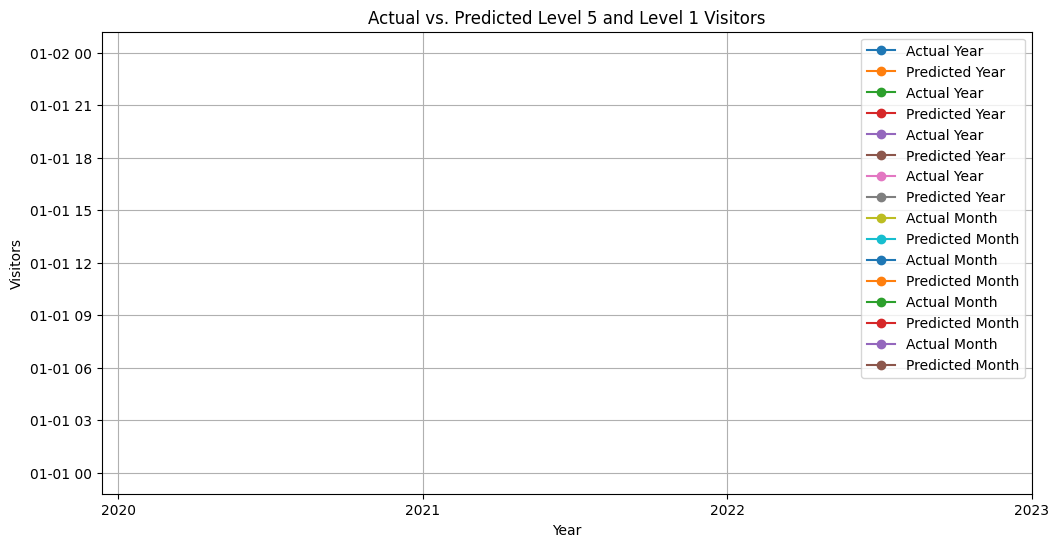

In [ ]:
# Plot the actual and predicted values for Level 5 and Level 1
plt.figure(figsize=(12, 6))
level5_column = 'Year'  # Replace with the correct column name if needed
level1_column = 'Month'
years_of_interest = ['2020', '2021', '2022', '2023']
for column in [level5_column, level1_column]:
      for year in years_of_interest:
        actual_values = data[(data['Year'].isin(years_of_interest))]['Year'].astype(str)
        actual_values = data[(data['Year'].isin(years_of_interest))][column]
        predicted_values = data[(data['Year'] == 2023)]['Year'].astype(str)
        predicted_values = data[(data['Year'] == 2023)][column]
        plt.plot(actual_values.index, actual_values.values, label=f'Actual {column}', marker='o')
        plt.plot(predicted_values.index, predicted_values.values, label=f'Predicted {column}', marker='o')

plt.title("Actual vs. Predicted Level 5 and Level 1 Visitors")
plt.xlabel("Year")
plt.ylabel("Visitors")
plt.xticks(range(len(years_of_interest)), years_of_interest)
plt.legend()
plt.grid(True)
plt.show()

To perform A/B testing on the "AB_TEST" sheet in the shared Excel file, you can create a metric such as "Click-Through Rate (CTR)" as a derived metric from the given number of clicks and visitors. CTR is a common metric used in A/B testing and digital marketing to measure the effectiveness of different variants or treatments. It is calculated as:

CTR = (Number of Clicks / Number of Visitors) * 100

The purpose of this A/B test would be to determine if there is a statistically significant difference in the CTR between the control group and the treatment group.

Here's a step-by-step explanation of how to perform the A/B test:

Hypothesis Formulation:

Null Hypothesis (H0): There is no significant difference in CTR between the control and treatment groups.
Alternative Hypothesis (H1): There is a significant difference in CTR between the control and treatment groups.
Data Preparation:

Calculate the CTR for both the control and treatment groups using the provided number of clicks and visitors.
Statistical Test Selection:

In this case, you can use a two-sample t-test or a chi-squared test for proportions to compare the CTR between the control and treatment groups.
Choose the appropriate test based on the nature of your data and the assumptions of each test.
Significance Level (Alpha):

Set a significance level (alpha) to determine the threshold for statistical significance. Common values for alpha are 0.05 or 0.01, depending on your desired level of confidence.
Perform the Statistical Test:

Calculate the test statistic and p-value based on the selected statistical test.
For the two-sample t-test, you compare the means of the CTR in the control and treatment groups.
For the chi-squared test, you compare the proportions of success (clicks) in the control and treatment groups.
Interpret the Results:

If the p-value is less than the chosen significance level (alpha), you reject the null hypothesis (H0) and conclude that there is a significant difference in CTR between the two groups.
If the p-value is greater than alpha, you fail to reject the null hypothesis, indicating no significant difference.
Conclusion:

Based on the results of the statistical test, you can determine whether the treatment group outperforms the control group in terms of CTR.
Report Findings:

Provide a detailed report of the A/B test results, including the calculated test statistic, p-value, and a clear statement of whether the null hypothesis was rejected or not.
Statistical Test Selection:

The choice between a two-sample t-test and a chi-squared test depends on the specific nature of your data and the assumptions of each test.
Use a two-sample t-test if your data meets the assumptions of normality and homogeneity of variances. This test is appropriate when comparing means (e.g., average CTR).
Use a chi-squared test for proportions if your data involves categorical variables (e.g., click vs. no-click) and doesn't meet the assumptions of a t-test.